In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tikzplotlib

In [2]:
!ls

 logging_config.yaml
 Performance.ipynb
'test_processing_module[processing_node-10hz-4]'
'test_processing_module[processing_node-120hz-4]'
'test_processing_module[processing_node-60hz-4]'


In [3]:
import pathlib

tex_dir = pathlib.Path('/home/manau/Code/TeX/thesis-tex/figures')

files = pathlib.Path().glob('./test_*')
frames = {f.name: pd.read_csv(f) for f in files}

In [4]:
import matplotlib.ticker as ticker
import numpy as np

funky = ticker.FuncFormatter(
    lambda y, _: '{:g}'.format(y)
)

In [5]:
import re
name_pattern = re.compile(r'.*\[(.*)\]')

for k in frames:
    print(name_pattern.match(k).groups())

('processing_node-10hz-4',)
('processing_node-60hz-4',)
('processing_node-120hz-4',)


In [6]:
colors = {
    'TUMBlue':'#0065BD',
    'TUMSecondaryBlue':'#005293',
    'TUMSecondaryBlue2':'#003359',
    'TUMBlack':'#000000',
    'TUMWhite':'#FFFFFF',
    'TUMDarkGray':'#333333',
    'TUMGray':'#808080',
    'TUMLightGray':'#CCCCC6',
    'TUMAccentGray':'#DAD7CB',
    'TUMAccentOrange':'#E37222',
    'TUMAccentGreen':'#A2AD00',
    'TUMAccentLightBlue':'#98C6EA',
    'TUMAccentBlue':'#64A0C8',
}

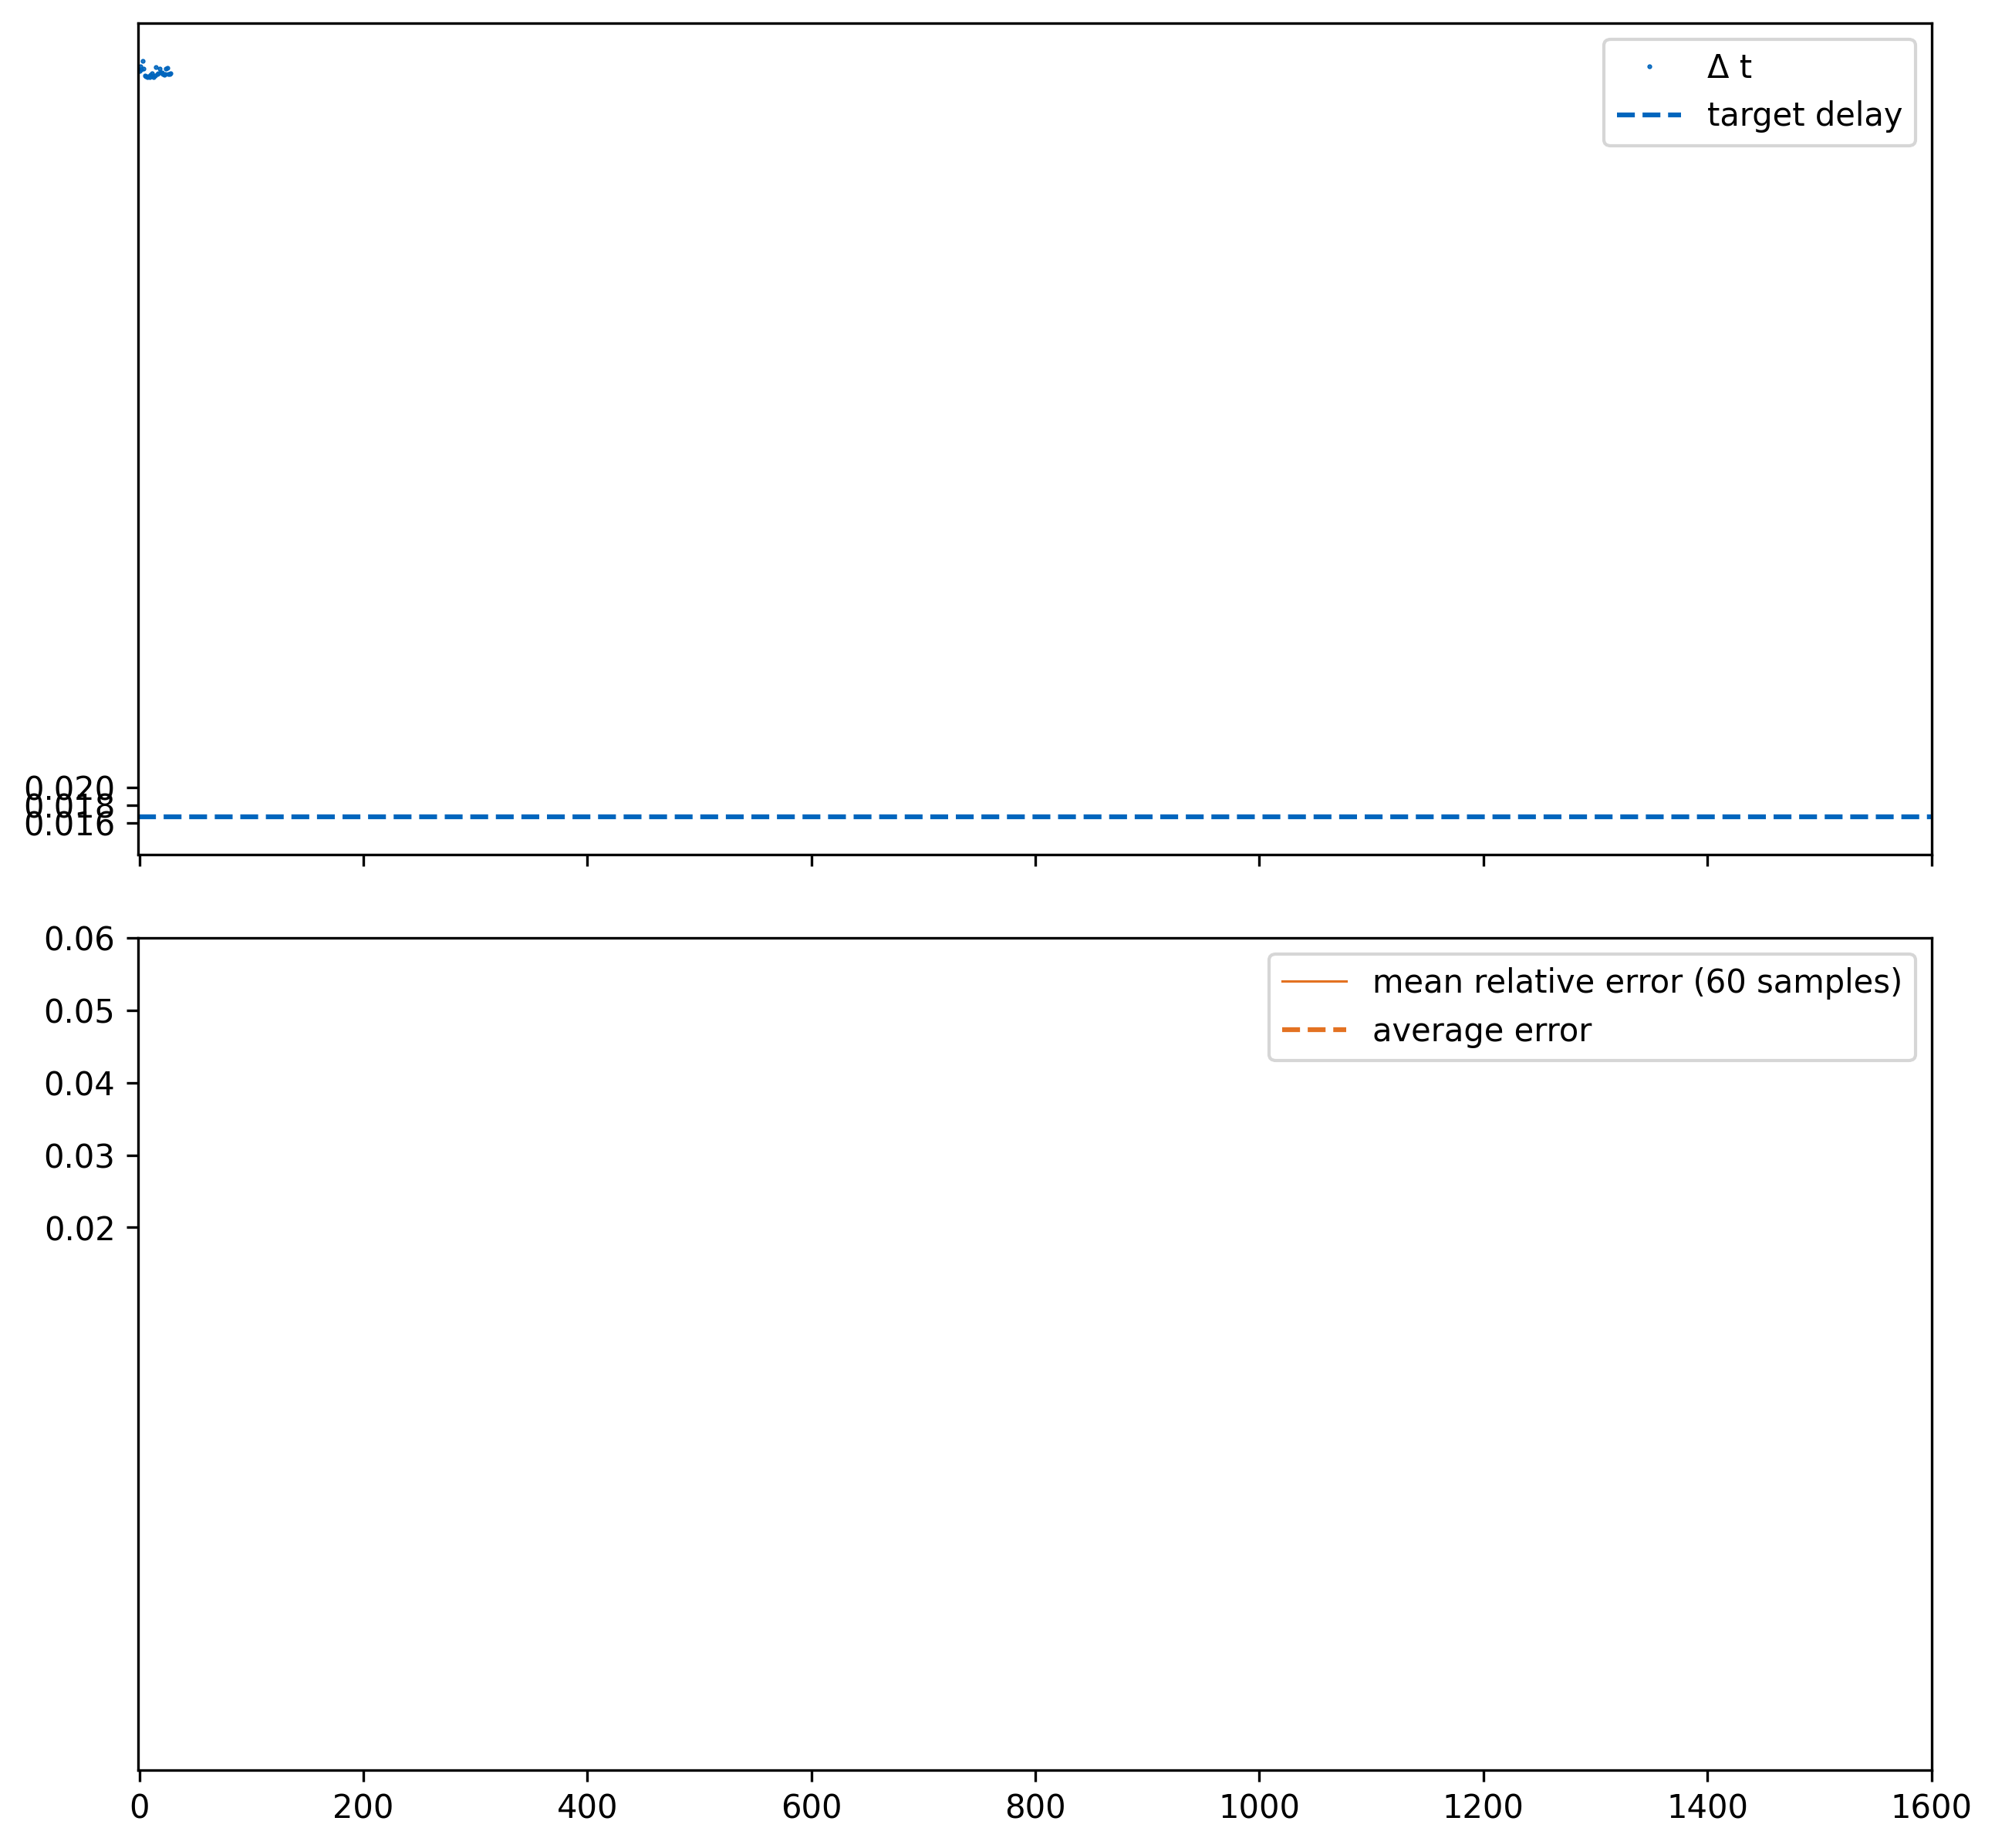

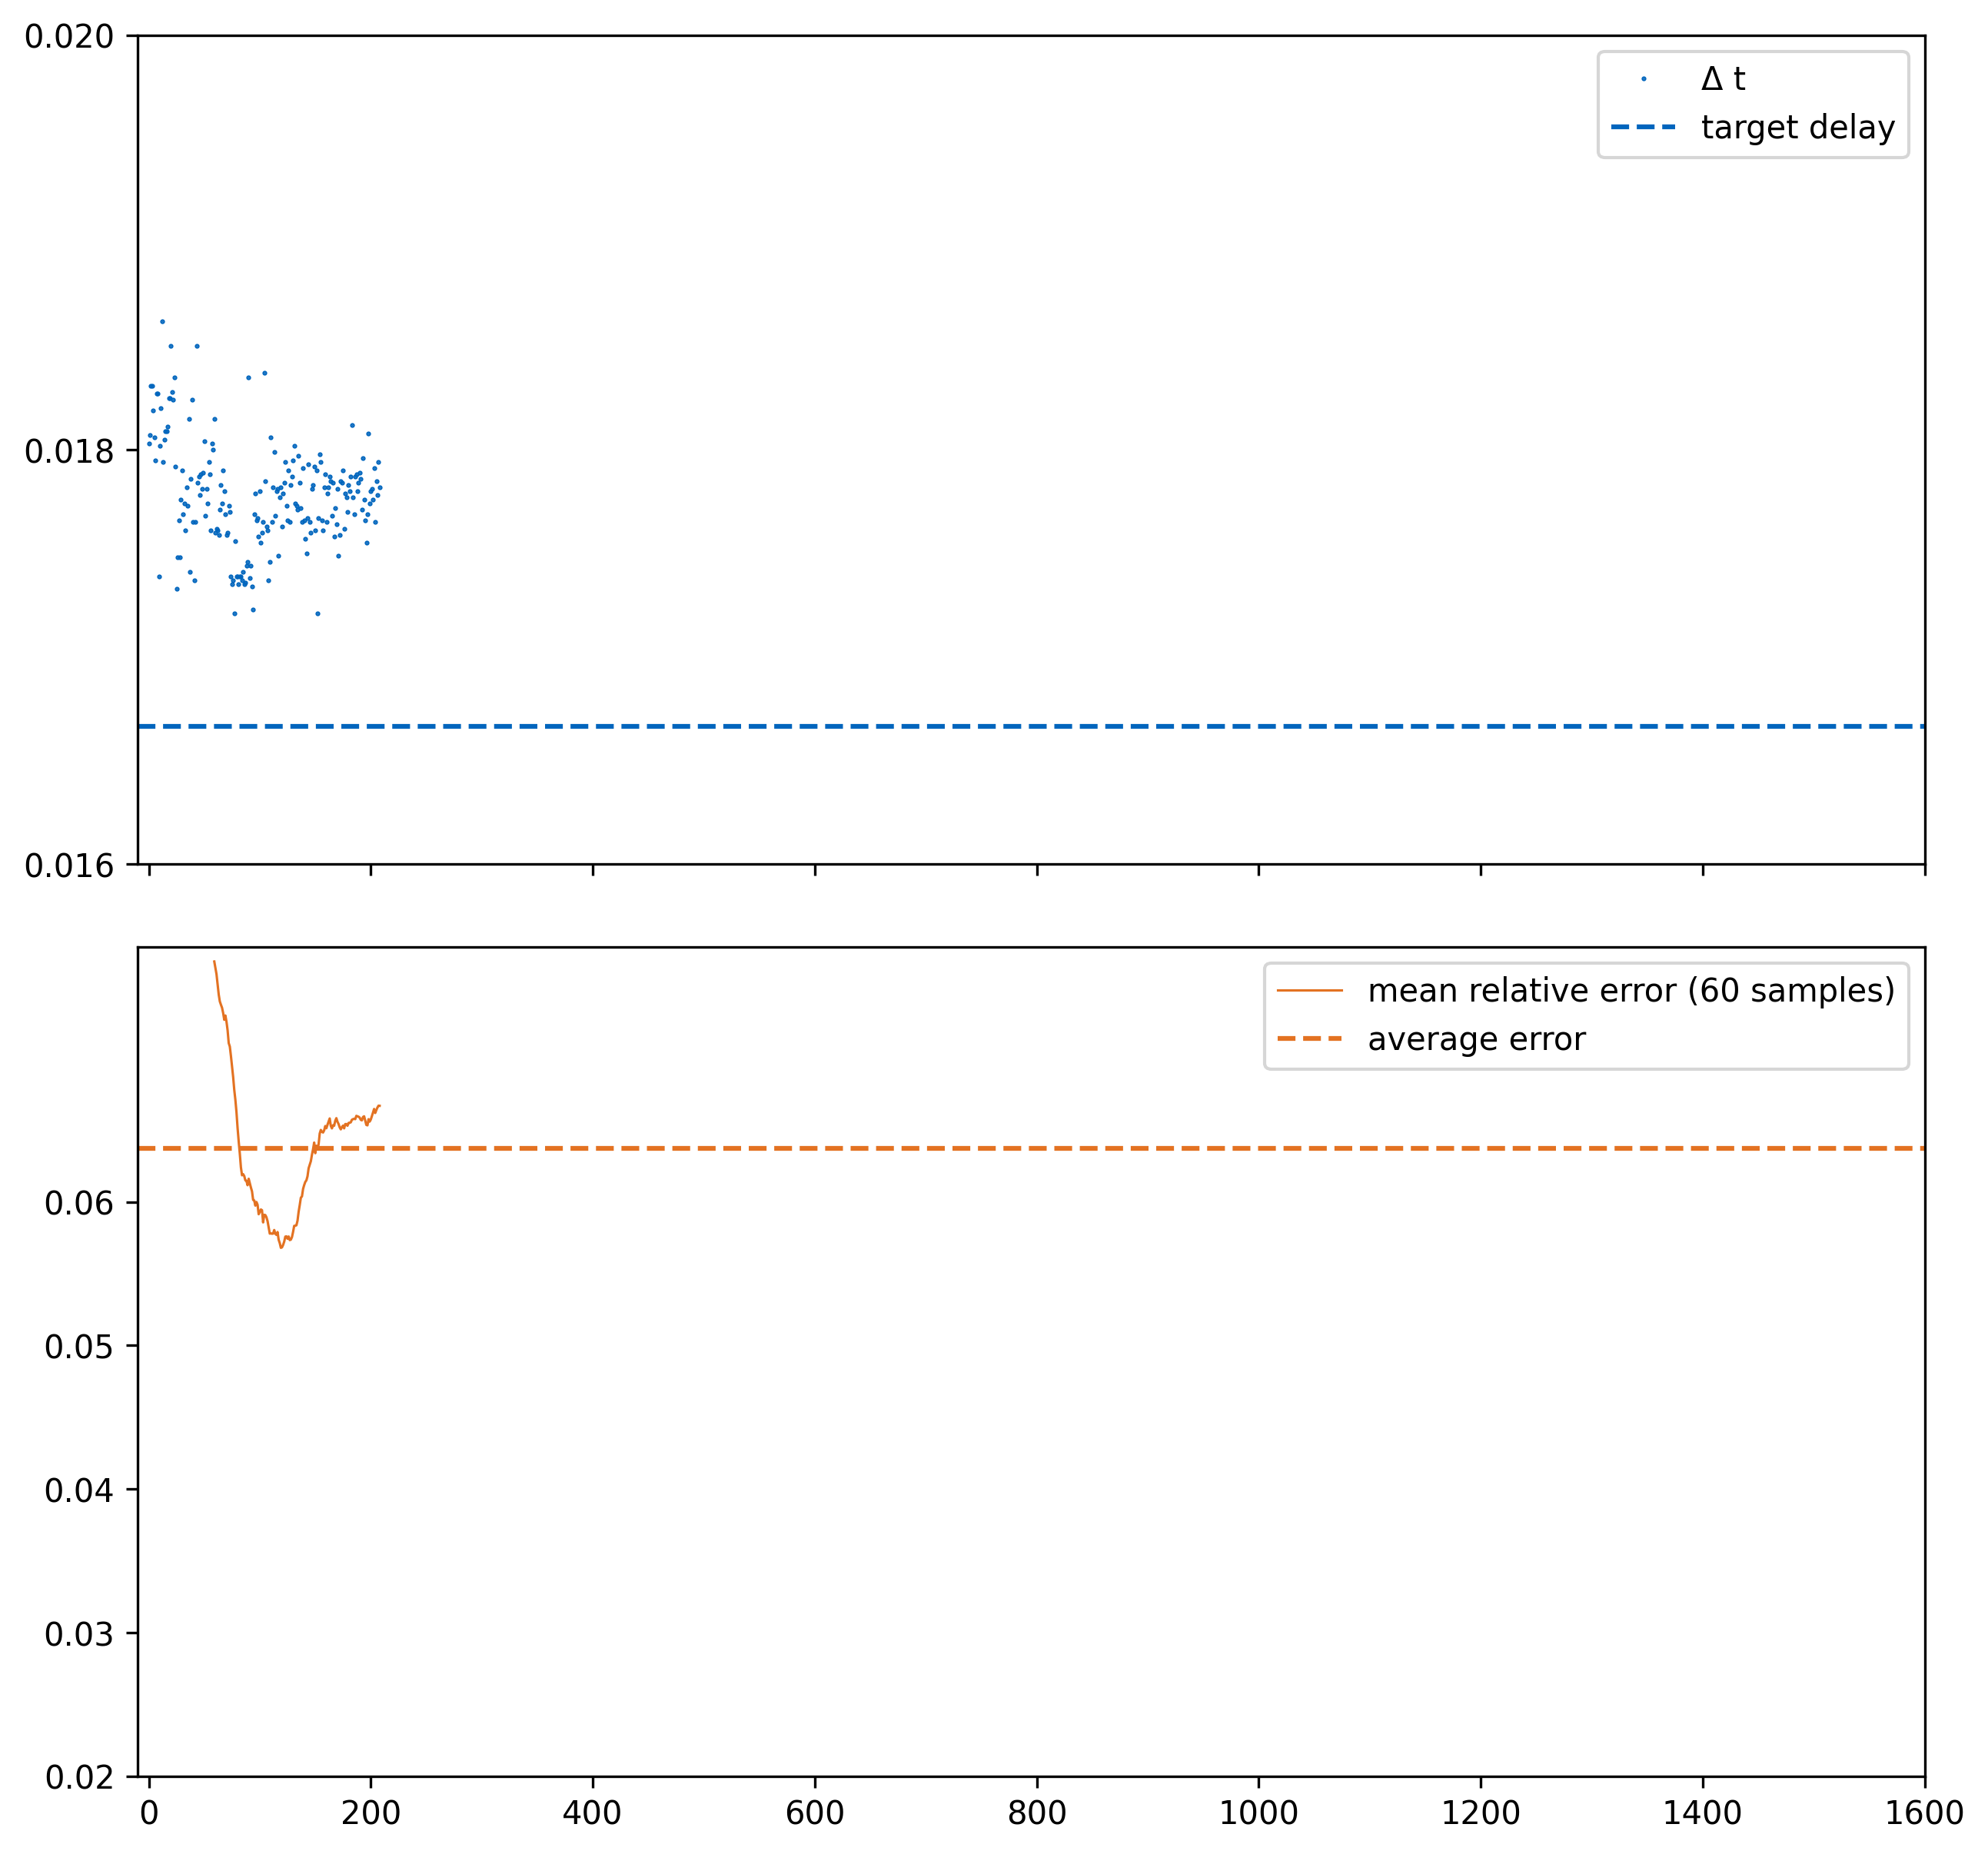

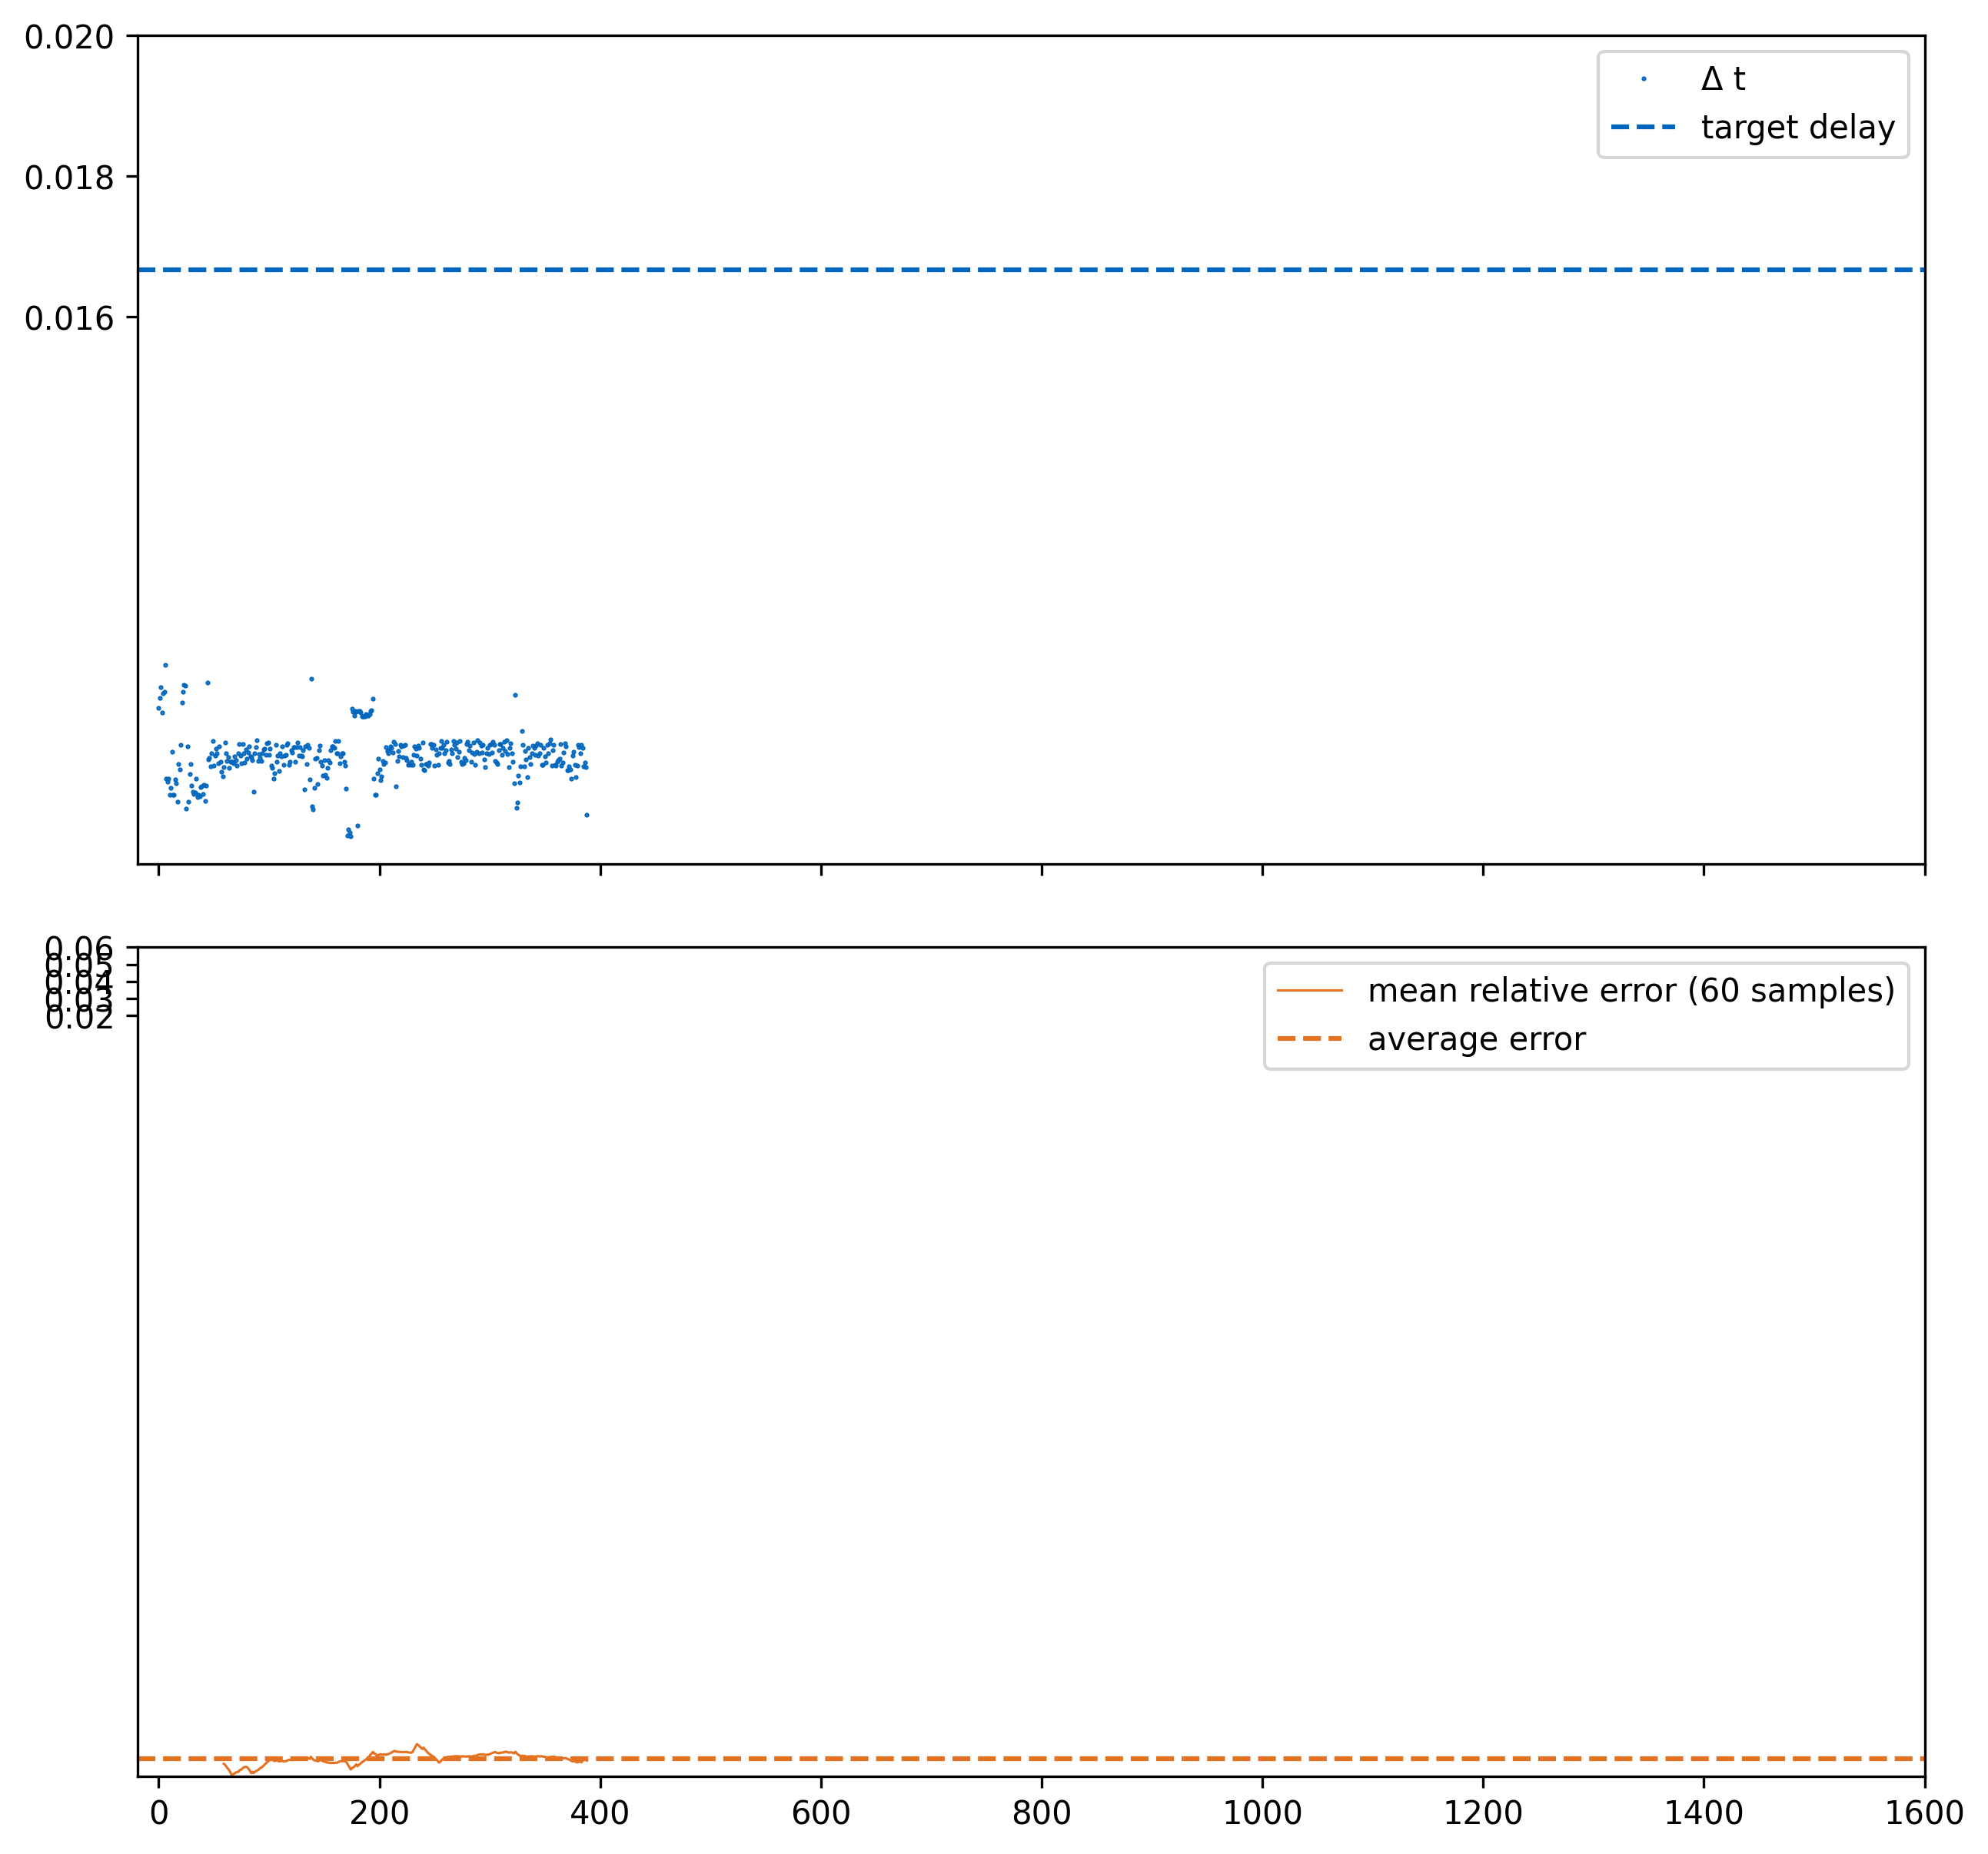

In [7]:
figsize = (10, 10)  # in inches
tikzplotlib_args = {
    'axis_height': f'{figsize[0] / 3.5}in', 
    'axis_width': f'{figsize[1] / 2}in',
    'strict': True,
    'extra_axis_parameters': ['log ticks with fixed point']
}

for num, (name, ifr) in enumerate(frames.items()):
    name, = name_pattern.match(name).groups()
    name = name.replace('.', '-').replace(' ', '-')
    target_delta = 1. / 60
    window_size = 60
    
    ifr['error'] = ifr['delta_times'] - target_delta
    ifr['rel_error'] = (ifr['error'] / target_delta).rolling(window_size).mean()
    
    fig = plt.figure()
    gs = fig.add_gridspec(2, hspace=0.1)
    top, bot = gs.subplots(sharex=True)
    fig.set_size_inches(*figsize)
    fig.set_dpi(300)
    
    top.plot(
        'delta_times', 
        '.', 
        data=ifr, 
        color=colors['TUMBlue'],
        markersize=1, 
        label='Δ t'
    )
    bot.plot(
        'rel_error',
        data=ifr,
        label=f'mean relative error ({window_size} samples)', 
        linewidth=0.75,
        color=colors['TUMAccentOrange']
    )
    top.axhline(
        target_delta,
        linestyle='dashed', 
        label='target delay',
        color=colors['TUMBlue']
    )
    bot.axhline(
        ifr['rel_error'].mean(), 
        color=colors['TUMAccentOrange'], 
        linestyle='dashed', 
        label='average error'
    )
    
    top.set_yticks(np.arange(0.016, 0.022, 0.002))
    bot.set_yticks(np.arange(0.02, 0.07, 0.01))
    
    for ax in (top, bot):
        ax.set_xticks(np.arange(0, 1800, 200))
        ax.legend()
    tikzplotlib.save(tex_dir / f'figure-{name}.tex', **tikzplotlib_args)